In [1]:
import numpy as np
from matplotlib import pyplot as plt

Fonctions de calculs :

In [2]:
def relu():
    return lambda t : max(0,t)
    
def relu_derivee():
    return lambda t : 1 if t > 0 else 0
    
def identite():
    return lambda t : t
    
def identite_derivee():
    return lambda t : 1
    
def tanh():
    return lambda t : np.tanh(t)
    
def tanh_derivee():
    return lambda t : 1- np.tanh(t)**2
    
cout_quadratique = lambda y,prediction: (prediction-y)**2
cout_quadratique_derivee = lambda y,prediction: 2*(prediction-y)

binary_cross_entropy_derivee = lambda y, prediction: (-y/prediction)+ ((1-y)/(1-prediction))
hinge_loss_derivee = lambda y, prediction: 0 if (prediction * y >= 1) else prediction*y
    
def binary_cross_entropy(y, prediction) : 
    sum = 0
    for i in range(0, len(y)):
        sum += y[i]*np.log(prediction[i]) + (1 - y[i]) * np.log(1-predicition[i])  
    return (-1/len(y))* sum

def sigmoid():
    return lambda t : 1 / (1 + np.exp(-t))
    
def sigmoid_derivee():
    sigma = sigmoid()
    return lambda t : sigma(t) * (1-sigma(t))

xor = lambda x : 1 if x[0]*x[1] >= 0 else 0

Classe pour notre réseau de neurones contenant toutes les fonctions nécessaires au fonctionnement

In [3]:
class ReseauNeurones:
    
    def __init__(self, taille = 1):
        self.taille = taille
        self.liste_fonctions= None
        self.x = None
        self.y = None
        self.w = []
        self.b = []
        self.liste_fonctions = []
        self.liste_derivees = []
        self.zsave = []
        self.asave = []
        self.prediction = None
        self.gradientw = []
        self.gradientb = []
        fonction_cout = None
        fonction_cout_derivee = None
    
    def set_fonction_cout(self, opti, derivee):
        self.fonction_cout = opti
        self.fonction_cout_derivee = derivee
    
    def ajouter_couche(self, f_activation, derivee_f_activation, nb_neurones = 1):
        self.liste_fonctions.append(f_activation)
        self.liste_derivees.append(derivee_f_activation)
        if(len(self.w)==0):
            self.w.append(np.random.normal(size = (nb_neurones,len(self.x[0]))))
        else:
            self.w.append(np.random.normal(size = (nb_neurones,len(self.w[len(self.w)-1]))))
        self.b.append(np.random.normal(size = (nb_neurones,1)))
        
    def set_data(self, x, y):
        self.x = x
        self.y = y
    
    def propagation_avant(self,vecteur_entree):
        z = []
        a = []
        ztmp=0
        L = len(self.liste_fonctions)
        x=vecteur_entree
        self.asave = []
        self.zsave = []
        self.asave.append(x)
        
        for l in range(0, L): #toutes les couches
            w = self.w[l]
            b = self.b[l]
            n = len(w)
            for nloop in range(0, n): #tous les neurones de chaque couches
                wn = w[nloop]
                bn = b[nloop]
                ztmp = wn.dot(x) + bn[0] #On calcul les différents z
                z.append(ztmp)
                ztmp = self.liste_fonctions[l](ztmp) #f(z)
                a.append(ztmp)
            x = a
            self.asave.append(a)
            self.zsave.append(z)
            a = []
            z = []
        self.prediction = ztmp
        
    def retropropagation(self, nabla_C): 
        L = len(self.liste_fonctions)
        ga = nabla_C
        for l in range(L-1,-1,-1):
            gz = []
            gw = []
            for k in range(0, len(ga)):
                gz.append(ga[k]*self.liste_derivees[l](self.zsave[l][k]))
            al = np.array(self.asave[l]).T
            for i in range(0,len(gz)):
                gwi = gz[i]*al
                gw.append(gwi)
            ga=[]
            ga = self.w[l].T.dot(gz)
            self.gradientb.append(gz)
            self.gradientw.append(gw)
        
    
    def pas_gradient(self, taux_apprentissage):
        
        L = len(self.liste_fonctions)
        gradientw = np.flip(self.gradientw)
        gradientb = np.flip(self.gradientb)
            
        for l in range(0, L):
            for i in range(0, len(self.w[l])):
                self.w[l][i] = self.w[l][i] - taux_apprentissage * gradientw[l][i]
                self.b[l][i] = self.b[l][i] - taux_apprentissage * gradientb[l][i]
    
    def descente_de_gradient(self, iterations,taux_apprentissage):
        k = 0
        vecteur_prediction= np.ones(self.taille)
        while k < iterations :
            if(k % 200 == 0) :
                print("Etapes ",k, " sur ", iterations)
            self.propagation_avant(self.x[k%self.taille])
            #self.retropropagation([binary_cross_entropy_derivee(self.y[k%self.taille],self.prediction)])
            self.retropropagation([self.fonction_cout_derivee(self.y[k%self.taille],self.prediction)])
            self.pas_gradient(taux_apprentissage)
            vecteur_prediction[k%self.taille] = self.prediction
            k += 1
        print("Etapes ",k, " sur ", iterations)
        return vecteur_prediction
    

Initialisation de notre jeu de données à données au réseau de neurones.
Et affichage de ces données.

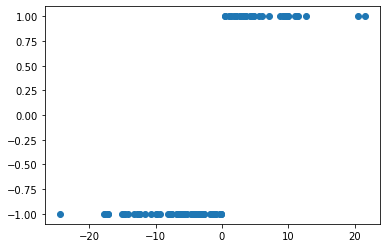

In [86]:
x = np.random.uniform(-5, 5, size=(100, 2))
y = []
z = []
for i in range(0,100):
    y.append(xor(x[i]))
for i in range(0,100):
    z.append(x[i][0]*x[i][1])    
plt.scatter(z, y)

Initialisation de notre Réseau de neurones avec 1000 entrées 

In [177]:
r = ReseauNeurones(1000)
r.set_fonction_cout(None, cout_quadratique_derivee)
r.set_data(x,y)
print(x)

[[-1.51295871  2.72568779]
 [-3.13652925  2.9594107 ]
 [ 0.48741973  2.64206106]
 [ 2.15084643  4.66028645]
 [ 2.17550703  2.21332345]
 [-2.87323377  2.69664891]
 [-3.41090911 -0.35386106]
 [-2.16501089  2.11172419]
 [-4.97161115  0.02983421]
 [-2.02852214  3.09202843]
 [ 1.93274067 -3.51834122]
 [-4.50962493 -2.14657881]
 [-0.5554271  -3.83333395]
 [ 4.11649211 -0.0487546 ]
 [ 2.57287945  1.04497573]
 [-3.57430178  3.50909856]
 [-3.40089054  0.97681367]
 [-4.62210297  3.26900517]
 [ 2.72270174 -1.95298582]
 [ 3.33075292 -3.98370128]
 [ 0.43589025 -4.00311972]
 [-2.9154688   2.07282005]
 [-0.57846841  4.56128171]
 [ 2.26027382 -0.58829264]
 [-0.51068779  0.47224201]
 [-2.41658968  1.34599187]
 [-4.39723078  2.82091676]
 [ 1.61723306  1.13307361]
 [-4.71365419 -0.57339579]
 [-4.6989627   3.6577879 ]
 [-2.55735671  3.84604993]
 [ 4.84710594 -0.02442092]
 [-2.17089671 -1.44827881]
 [-2.3318151   2.58204583]
 [-0.13242626 -3.57729119]
 [-4.59848703 -4.67759279]
 [ 2.65027768  4.14372053]
 

Ajout des différents couches de notre réseau avec leurs fonctions et le nombre de neurones présents dans chaque couche. 

In [178]:
r.ajouter_couche(sigmoid(),sigmoid_derivee(),500)
r.ajouter_couche(sigmoid(),sigmoid_derivee(),375)
r.ajouter_couche(sigmoid(),sigmoid_derivee(),250)
r.ajouter_couche(sigmoid(),sigmoid_derivee(),125)
r.ajouter_couche(sigmoid(),sigmoid_derivee(),1)

Descente de gradient sur notre jeu de données avec un coefficient $\alpha$ = 0.01.

In [179]:
resultat = r.descente_de_gradient(2000, 0.01)

Etapes  0  sur  10000
Etapes  200  sur  10000
Etapes  400  sur  10000
Etapes  600  sur  10000
Etapes  800  sur  10000
Etapes  1000  sur  10000
Etapes  1200  sur  10000
Etapes  1400  sur  10000
Etapes  1600  sur  10000
Etapes  1800  sur  10000
Etapes  2000  sur  10000
Etapes  2200  sur  10000
Etapes  2400  sur  10000
Etapes  2600  sur  10000
Etapes  2800  sur  10000
Etapes  3000  sur  10000
Etapes  3200  sur  10000
Etapes  3400  sur  10000
Etapes  3600  sur  10000
Etapes  3800  sur  10000
Etapes  4000  sur  10000
Etapes  4200  sur  10000
Etapes  4400  sur  10000
Etapes  4600  sur  10000
Etapes  4800  sur  10000
Etapes  5000  sur  10000
Etapes  5200  sur  10000
Etapes  5400  sur  10000
Etapes  5600  sur  10000
Etapes  5800  sur  10000
Etapes  6000  sur  10000
Etapes  6200  sur  10000
Etapes  6400  sur  10000
Etapes  6600  sur  10000
Etapes  6800  sur  10000
Etapes  7000  sur  10000
Etapes  7200  sur  10000
Etapes  7400  sur  10000
Etapes  7600  sur  10000
Etapes  7800  sur  10000
Etapes 

On regarde le nombre de données bien classifié par notre réseau de neurones et on en fait une moyenne.

In [180]:
donneesfinales = []
moy = 0
res = 0
for i in range(0, 1000):
    if(y[i]==1):
        res+=1 
for i in range(0, 1000):
    if(resultat[i]>=0.5):
        donneesfinales.append(1)
    else:
        donneesfinales.append(0)
for i in range(0, 1000) : 
    if y[i] == donneesfinales[i]:
        moy += 1
print(moy/1000)
print(res) 

0.37
39


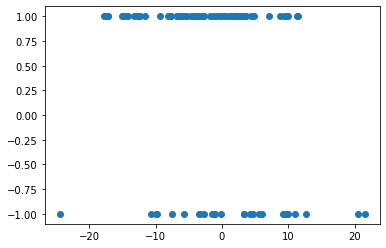

In [181]:
plt.scatter(z, donneesfinales)

Jeu de données en entrée :

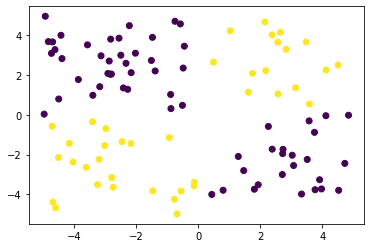

In [162]:
plt.scatter(x[:,0],x[:,1], c = y)

Jeu de données obtenus en sortie : 

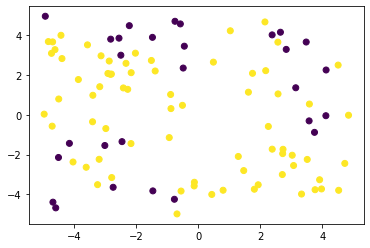

In [182]:
plt.scatter(x[:,0],x[:,1], c = donneesfinales)

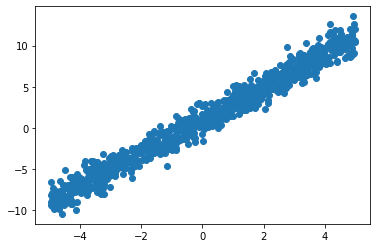

In [49]:
x = np.random.uniform(-5, 5, size=(1000,1))
y = []
a = 2
b = 1
for i in range(0,1000):
    y.append(a*x[i] + b + np.random.randn())
plt.scatter(x, y)

Etapes  0  sur  10000
Etapes  200  sur  10000
Etapes  400  sur  10000
Etapes  600  sur  10000
Etapes  800  sur  10000
Etapes  1000  sur  10000
Etapes  1200  sur  10000
Etapes  1400  sur  10000
Etapes  1600  sur  10000
Etapes  1800  sur  10000
Etapes  2000  sur  10000
Etapes  2200  sur  10000
Etapes  2400  sur  10000
Etapes  2600  sur  10000
Etapes  2800  sur  10000
Etapes  3000  sur  10000
Etapes  3200  sur  10000
Etapes  3400  sur  10000
Etapes  3600  sur  10000
Etapes  3800  sur  10000
Etapes  4000  sur  10000
Etapes  4200  sur  10000
Etapes  4400  sur  10000
Etapes  4600  sur  10000
Etapes  4800  sur  10000
Etapes  5000  sur  10000
Etapes  5200  sur  10000
Etapes  5400  sur  10000
Etapes  5600  sur  10000
Etapes  5800  sur  10000
Etapes  6000  sur  10000
Etapes  6200  sur  10000
Etapes  6400  sur  10000
Etapes  6600  sur  10000
Etapes  6800  sur  10000
Etapes  7000  sur  10000
Etapes  7200  sur  10000
Etapes  7400  sur  10000
Etapes  7600  sur  10000
Etapes  7800  sur  10000
Etapes 

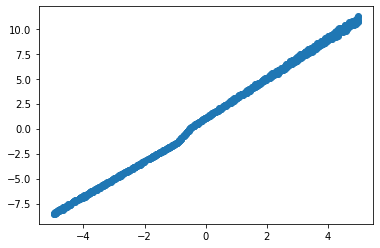

In [51]:
r = ReseauNeurones(1000)
r.set_fonction_cout(cout_quadratique, cout_quadratique_derivee)

r.set_data(x,y)
r.ajouter_couche(relu(),relu_derivee(),3)
r.ajouter_couche(identite(),identite_derivee(),1)
resultat = r.descente_de_gradient(10000, 0.0001)
plt.scatter(x, resultat)

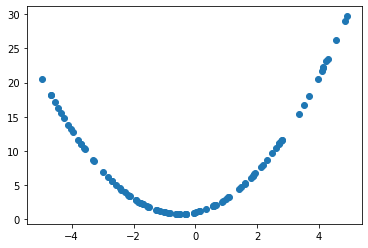

In [47]:
x = np.random.uniform(-5, 5, size=(100,1))
y = []
a = 1
b = 1
c = 1
for i in range(0,100):
    y.append(a*x[i]**2 + b*x[i] + c)
plt.scatter(x, y)

Etapes  0  sur  5000
Etapes  200  sur  5000
Etapes  400  sur  5000
Etapes  600  sur  5000
Etapes  800  sur  5000
Etapes  1000  sur  5000
Etapes  1200  sur  5000
Etapes  1400  sur  5000
Etapes  1600  sur  5000
Etapes  1800  sur  5000
Etapes  2000  sur  5000
Etapes  2200  sur  5000
Etapes  2400  sur  5000
Etapes  2600  sur  5000
Etapes  2800  sur  5000
Etapes  3000  sur  5000
Etapes  3200  sur  5000
Etapes  3400  sur  5000
Etapes  3600  sur  5000
Etapes  3800  sur  5000
Etapes  4000  sur  5000
Etapes  4200  sur  5000
Etapes  4400  sur  5000
Etapes  4600  sur  5000
Etapes  4800  sur  5000
Etapes  5000  sur  5000


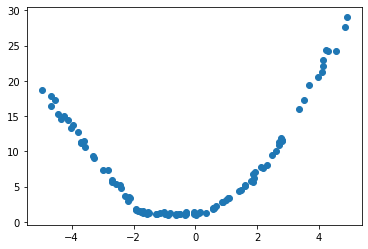

In [48]:
r = ReseauNeurones(100)
r.set_fonction_cout(cout_quadratique, cout_quadratique_derivee)

r.set_data(x,y)
r.ajouter_couche(relu(),relu_derivee(),18)
r.ajouter_couche(relu(),relu_derivee(),9)
r.ajouter_couche(relu(),relu_derivee(),3)
r.ajouter_couche(identite(),identite_derivee(),1)
resultat = r.descente_de_gradient(5000, 0.00005)
plt.scatter(x, resultat)